In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import pandas as pd
from utility.graph_utility import GraphUtility

# [[freq, logmag, phase], [freq, logmag, phse], ・・・]

In [2]:
# 1folder
folder = "20220922_184017_10dB_-0.0--0.2V_8.5-11.0"
filename = "20220922_184017_10dB_0.0V.csv"
file_day = "20220922_184017_10dB_"
csvname = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder + "/" + filename

df = pd.read_csv(csvname, sep=',',header=None, usecols=[0,1,2,3,4,5])
all_freq = df.iloc[17:,1]
freq_start = all_freq.head(1)
freq_end = all_freq.tail(1)
print(all_freq, freq_start, freq_end)

# dB = 5
dB = float(df.iat[0, 5])
print(dB)
minV = float(df.iat[1,5])
maxV = float(df.iat[2,5])
numV = int(df.iat[3,5])
# maxV = 5.125
# numV = 6
v0 = np.linspace(minV, maxV, numV)

if v0[1] > 0:
    v = v0
else:
    v = np.flip(v0)

print(minV, maxV, v)


17           8.5
18       8.50125
19        8.5025
20       8.50375
21         8.505
          ...   
2013      10.995
2014    10.99625
2015     10.9975
2016    10.99875
2017          11
Name: 1, Length: 2001, dtype: object 17    8.5
Name: 1, dtype: object 2017    11
Name: 1, dtype: object
10.0
0.0 -0.2 [-0.2   -0.196 -0.192 -0.188 -0.184 -0.18  -0.176 -0.172 -0.168 -0.164
 -0.16  -0.156 -0.152 -0.148 -0.144 -0.14  -0.136 -0.132 -0.128 -0.124
 -0.12  -0.116 -0.112 -0.108 -0.104 -0.1   -0.096 -0.092 -0.088 -0.084
 -0.08  -0.076 -0.072 -0.068 -0.064 -0.06  -0.056 -0.052 -0.048 -0.044
 -0.04  -0.036 -0.032 -0.028 -0.024 -0.02  -0.016 -0.012 -0.008 -0.004
  0.   ]


In [11]:
phase = {}
# diff = {}
for m,n in enumerate(v):
    # print(m,n)
    filename = file_day + str(n) + "V.csv"
    csvname1 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder + "/" + filename
    
    phase[n] = np.loadtxt(csvname1, skiprows=17, usecols=[3], delimiter=',', unpack=True)


In [12]:
v_array = np.array(v)
print(v_array.dtype)
freq_array =  np.loadtxt(csvname, skiprows=17, usecols=[1], delimiter=',', unpack=True)
# freq_array = np.array(freq_array, dtype=float)
print(freq_array)

float64
[ 8.5      8.50125  8.5025  ... 10.9975  10.99875 11.     ]


[[-44.19711 -44.21075 -44.43069 ... -44.74741 -44.18614 -44.21479]
 [-43.85645 -43.89914 -43.92197 ... -44.18926 -43.87551 -43.88421]
 [-43.39781 -43.50627 -43.53201 ... -43.81149 -43.65581 -43.63792]
 ...
 [144.506   143.4301  144.0308  ... 144.4263  145.9672  144.9754 ]
 [145.6873  144.0372  144.9104  ... 144.9386  145.834   146.219  ]
 [145.5818  145.5555  146.0142  ... 146.63    147.2109  147.081  ]]


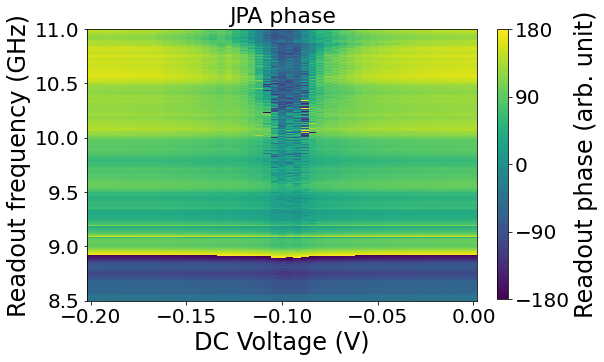

In [8]:
#　位相評価
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 20
x = v
y = freq_array


X, Y = np.meshgrid(x, y)
# print(X,Y)
Z = np.zeros((len(x), len(y)))
for i in range(len(x)):
    # print(i)
    Z[i] = phase[x[i]]
    # print(Z[i])
Z_T = Z.transpose()
print(Z_T)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(X, Y, Z_T, shading="auto" , vmin=-180, vmax=180)
hoge00.set_clim(-180, 180)
cax = plt.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = plt.colorbar(hoge00, cax=cax, ticks=[-180, -90, 0, 90, 180])
# cbar = fig.colorbar(ticks=[-180, -90, 0, 90, 180])

ax.set_title("JPA phase", size=22)
ax.set_xlabel('DC Voltage (V)', size=24)
ax.set_ylabel('Readout frequency (GHz)', size=24)
cbar.set_label("Readout phase (arb. unit)", size=24) #カラーバーのラベル


plt.show()
del plt


In [17]:
diff = {}
for i,m in enumerate(v):
    diff[m] = abs(phase[v[i]] - phase[v[i-1]])
    # print(i)
    for l in range(len(diff[m])):
        # print((diff[i])[l])
        if (diff[m])[l] > 180:
            (diff[m])[l] = 360 - (diff[m])[l]
    diff[m] = diff[m]
    
print(diff)

{-0.2: array([0.01768, 0.02776, 0.24011, ..., 0.4694 , 0.5317 , 1.4992 ]), -0.196: array([0.01364, 0.04269, 0.10846, ..., 1.0759 , 1.6501 , 0.0263 ]), -0.192: array([0.21994, 0.02283, 0.02574, ..., 0.6007 , 0.8732 , 0.4587 ]), -0.188: array([0.15013, 0.19953, 0.17682, ..., 0.2233 , 1.0564 , 1.2459 ]), -0.184: array([0.06238, 0.02235, 0.03534, ..., 1.1718 , 1.0657 , 1.3804 ]), -0.18: array([0.12626, 0.05514, 0.20056, ..., 1.1531 , 0.6293 , 1.3203 ]), -0.176: array([0.14846, 0.17276, 0.05202, ..., 1.9594 , 1.1217 , 1.6979 ]), -0.17200000000000001: array([0.03898, 0.27512, 0.1068 , ..., 2.312  , 0.0991 , 2.2601 ]), -0.168: array([0.05927, 0.04981, 0.19792, ..., 2.6216 , 0.4168 , 1.2407 ]), -0.164: array([0.06649, 0.01183, 0.03335, ..., 6.8729 , 9.3441 , 7.2528 ]), -0.16: array([0.95238, 1.03666, 0.80559, ..., 3.5986 , 0.6994 , 5.3946 ]), -0.156: array([0.34178, 0.03513, 0.35085, ..., 1.996  , 4.5937 , 3.2526 ]), -0.152: array([2.4800e-03, 4.6354e-01, 2.0112e-01, ..., 4.7462e+00, 7.3405e+0

[[0.01768 0.01364 0.21994 ... 0.12942 0.56127 0.02865]
 [0.02776 0.04269 0.02283 ... 0.09041 0.31375 0.0087 ]
 [0.24011 0.10846 0.02574 ... 0.07023 0.15568 0.01789]
 ...
 [0.4694  1.0759  0.6007  ... 1.2783  1.5409  0.9918 ]
 [0.5317  1.6501  0.8732  ... 0.1478  0.8954  0.385  ]
 [1.4992  0.0263  0.4587  ... 1.3553  0.5809  0.1299 ]]


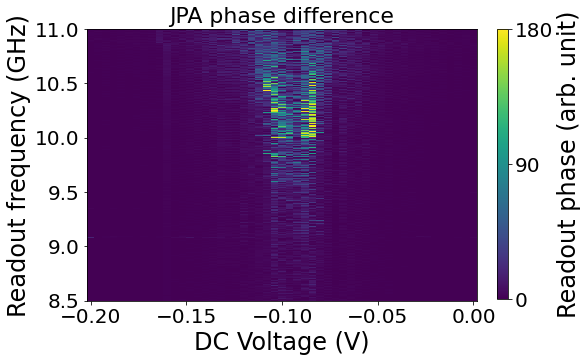

In [18]:
# 差分評価
import matplotlib.pyplot as plt
from numpy import size
plt.rcParams["font.size"] = 20
x = v
y = freq_array


X, Y = np.meshgrid(x, y)
# print(X,Y)
Z = np.zeros((len(x), len(y)))
for i in range(len(x)):
    Z[i] = diff[x[i]]
Z_T = Z.transpose()
print(Z_T)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(X, Y, Z_T,shading="auto", vmin=-180, vmax=180)
hoge00.set_clim(0, 180)
cax = plt.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = plt.colorbar(hoge00, cax=cax, ticks=[0, 90, 180])
# cbar = plt.colorbar(hoge00, cax=cax, ticks=[-180, -90, 0, 90, 180])
# cbar = fig.colorbar(ticks=[-180, -90, 0, 90, 180])

ax.set_title("JPA phase difference", size=22)
ax.set_xlabel('DC Voltage (V)', size = 24)
ax.set_ylabel('Readout frequency (GHz)', size = 24)
cbar.set_label("Readout phase (arb. unit)", size = 24) #カラーバーのラベル


plt.show()
del plt
